In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#读取数据
pokemon_data=pd.read_csv("Pokemon.csv",encoding='latin-1')
print(pokemon_data)
# series=pd.Series([1,"2",1.0,[1,2,3],{2:3,3:"5",4:[1,2,3]}],name='A')
# print(pokemon_data.columns)
# pokemon_data['Attack'] = pd.to_numeric(pokemon_data['Attack'], errors='coerce')
# att_labels=pokemon_data.loc[pokemon_data['Attack']>500]
# print(att_labels)

             #                       Name     Type 1     Type 2      Total  \
0            1                  Bulbasaur      Grass     Poison        318   
1            2                    Ivysaur      Grass     Poison        405   
2            3                   Venusaur      Grass     Poison        525   
3            3      VenusaurMega Venusaur      Grass     Poison        625   
4            4                 Charmander       Fire        NaN        309   
5            5                 Charmeleon       Fire        NaN        405   
6            6                  Charizard       Fire     Flying        534   
7            6  CharizardMega Charizard X       Fire     Dragon        634   
8            6  CharizardMega Charizard Y       Fire     Flying        634   
9            7                   Squirtle      Water        NaN        314   
10           8                  Wartortle      Water        NaN        405   
11           9                  Blastoise      Water        NaN 

In [8]:
#删除末尾两行数据
row_label1=pokemon_data.iloc[-1].name
row_label2=pokemon_data.iloc[-2].name
pokemon_data_dl=pokemon_data.drop(row_label1)
pokemon_data_dl2=pokemon_data_dl.drop(row_label2)
print(pokemon_data_dl2)
# pokemon_data_dl2=pokemon_data_dl2.replace('undefined',np.nan)


# print(pokemon_data_dl2)

             #                       Name     Type 1     Type 2      Total  \
0            1                  Bulbasaur      Grass     Poison        318   
1            2                    Ivysaur      Grass     Poison        405   
2            3                   Venusaur      Grass     Poison        525   
3            3      VenusaurMega Venusaur      Grass     Poison        625   
4            4                 Charmander       Fire        NaN        309   
5            5                 Charmeleon       Fire        NaN        405   
6            6                  Charizard       Fire     Flying        534   
7            6  CharizardMega Charizard X       Fire     Dragon        634   
8            6  CharizardMega Charizard Y       Fire     Flying        634   
9            7                   Squirtle      Water        NaN        314   
10           8                  Wartortle      Water        NaN        405   
11           9                  Blastoise      Water        NaN 

Flying       98
Poison       37
Ground       35
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Water        14
Ice          14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
undefined     2
273           1
BBB           1
0             1
A             1
Name: Type 2, dtype: int64


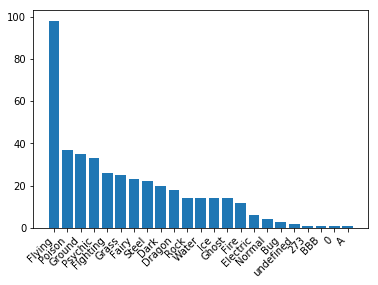

       #                 Name    Type 1 Type 2 Total   HP Attack Defense  \
34    27            Sandshrew    Ground      0   300   50     75      85   
39    32     Nidoranâ?Poison       NaN    273    46   57     40      40   
117  107           Hitmonchan  Fighting      A   455   50    105      79   
428  382  KyogrePrimal Kyogre     Water    BBB   770  100    150      90   

    Sp. Atk Sp. Def Speed Generation Legendary  
34       20      30    40          1     FALSE  
39       40      50     1      FALSE       NaN  
117      35     110    76          1     FALSE  
428     180     160    90          3      TRUE  
             #                       Name     Type 1     Type 2      Total  \
0            1                  Bulbasaur      Grass     Poison        318   
1            2                    Ivysaur      Grass     Poison        405   
2            3                   Venusaur      Grass     Poison        525   
3            3      VenusaurMega Venusaur      Grass     Poiso

In [9]:
#删除type2取值异常的数据
#先统计type2的所有取值及其数量
type2_values_counts=pokemon_data_dl2['Type 2'].value_counts()
print(type2_values_counts)
labels =type2_values_counts.index.tolist()
values = type2_values_counts.values.tolist()
# 绘制柱状图
plt.bar(range(len(labels)), values)  # 使用索引作为x轴位置
# 设置x轴标签为实际标签名称
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')
# plt.tight_layout()
plt.show()
plt.close()
#发现异常值 BBB,0,273,A 删除
match_labels=pokemon_data_dl2.loc[pokemon_data_dl2['Type 2'].isin(['A','0','BBB','273'])]
print(match_labels)
pokemon_data_dl3=pokemon_data_dl2.drop(match_labels.index)
print(pokemon_data_dl3)

In [128]:
#删除重复数据
pokemon_data_dl3.drop_duplicates()
print(pokemon_data_dl3)

             #                       Name     Type 1     Type 2      Total  \
0            1                  Bulbasaur      Grass     Poison        318   
1            2                    Ivysaur      Grass     Poison        405   
2            3                   Venusaur      Grass     Poison        525   
3            3      VenusaurMega Venusaur      Grass     Poison        625   
4            4                 Charmander       Fire        NaN        309   
5            5                 Charmeleon       Fire        NaN        405   
6            6                  Charizard       Fire     Flying        534   
7            6  CharizardMega Charizard X       Fire     Dragon        634   
8            6  CharizardMega Charizard Y       Fire     Flying        634   
9            7                   Squirtle      Water        NaN        314   
10           8                  Wartortle      Water        NaN        405   
11           9                  Blastoise      Water        NaN 

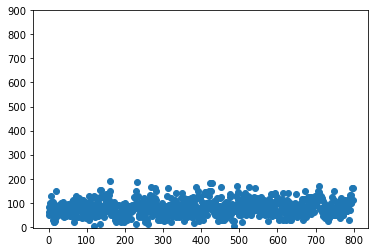

In [168]:
#删除attack异常的数据
pokemon_data_dl3['Attack'] = pokemon_data_dl3['Attack'].astype(str)
pokemon_data_dl3 = pokemon_data_dl3[pokemon_data_dl3['Attack'] != 'undefined']
pokemon_data_dl3['Attack'] = pd.to_numeric(pokemon_data_dl3['Attack'], errors='coerce')
pokemon_data_dl3 = pokemon_data_dl3[pokemon_data_dl3['Attack']<500]
plt.scatter(range(pokemon_data_dl3.shape[0]),pokemon_data_dl3.iloc[:,6])

y_ticks = range(0, 1000, 100)
plt.yticks(y_ticks)
plt.show()
# 2. 转换'Attack'列为数值类型（避免比较时出现类型错误）
pokemon_data_dl3['Attack'] = pd.to_numeric(pokemon_data_dl3['Attack'], errors='coerce')
pokemon_data_dl3 = pokemon_data_dl3[pokemon_data_dl3['Attack']<500]

In [123]:
#交换
swaptup=pokemon_data_dl3[pokemon_data_dl3['Generation'].isin(['FALSE','TRUE'])].index
print(swaptup)
for i in swaptup:
    temp=pokemon_data_dl3.at[i,'Generation']
    pokemon_data_dl3.at[i,'Generation']=pokemon_data_dl3.at[i,'Legendary']
    pokemon_data_dl3.at[i,'Legendary']=temp
swaptup=pokemon_data_dl3[pokemon_data_dl3['Generation'].isin(['FALSE','TRUE'])].index
print(swaptup)

Int64Index([11, 32], dtype='int64')
Int64Index([], dtype='int64')
